In [1]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

from model import LSCCNN

In /Users/aliabdalla/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /Users/aliabdalla/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /Users/aliabdalla/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.


In [2]:
from download_from_google import download_file_from_google_drive
import os 

if not os.path.exists("weights/weights.pth"):
    url = "https://drive.google.com/file/d/1DLItw5kHKbX81w60ybT8paVsjkY2Pj8_"
    output = 'weights/weights.pth'
    file_id = '1DLItw5kHKbX81w60ybT8paVsjkY2Pj8_'
    download_file_from_google_drive(file_id, output)


In [3]:
checkpoint_path = './weights/weights.pth'
network = LSCCNN(checkpoint_path=checkpoint_path)
# network.cuda()
network.eval();

In [4]:
image = cv2.imread('./images/protest.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [5]:
emoji = cv2.imread("images/blm_fist.png", -1)

In [6]:
pred_dot_map, pred_box_map, img_out = network.predict_single_image(image, emoji, nms_thresh=0.25)

/Users/aliabdalla/Desktop/repos/lsc-cnn/utils_model.py:30: UserWarning: This overload of nonzero is deprecated:
	nonzero(Tensor input, *, Tensor out)
Consider using one of the following signatures instead:
	nonzero(Tensor input, *, bool as_tuple) (Triggered internally at  ../torch/csrc/utils/python_arg_parser.cpp:766.)
  indices = torch.nonzero(input_)


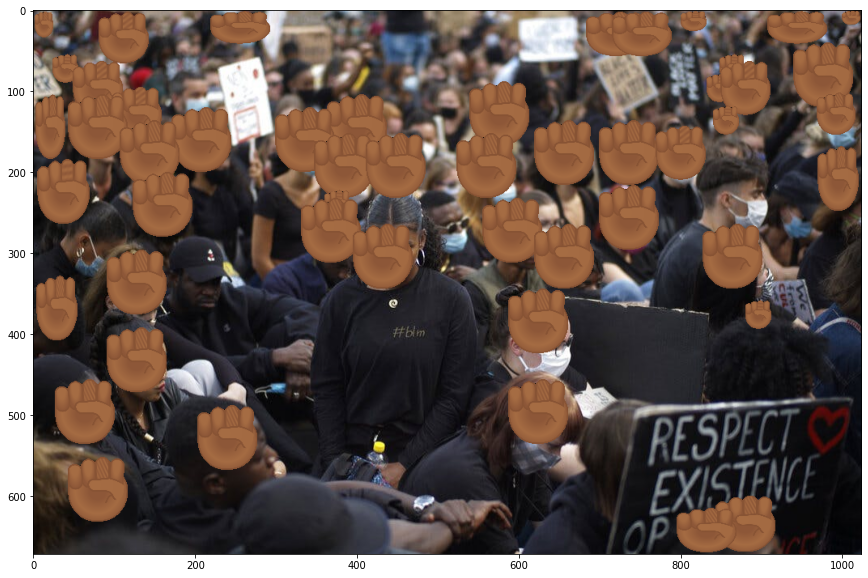

In [7]:
plt.figure(figsize=(18,10))
plt.imshow(img_out)
plt.show()